O pré-processamento de dados é um conjunto de atividades que envolvem preparação, organização e estruturação dos dados. Trata-se de uma etapa fundamental que precede a realização de análises e predições.

O método de pré-processamento é um dos pilares da CRISP-DM, e ela é essencial para as atividades de análise de dados, caso contrário, entrará e sairá lixo do modelo. Levando a resultados imprecisos.

O [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) permite aplicar, de forma sequencial, uma lista de transformações para o preprocessamento os dados e, se for necessário, concluir a sequência com um modelo final para previsão.

Os passos intermediários do pipeline devem ser transformadores, ou seja, precisam implementar os métodos `fit` e `transform`. O estimador final precisa apenas implementar o método `fit`.

O objetivo do `Pipeline` é reunir várias etapas que podem ser validadas em conjunto enquanto diferentes parâmetros são ajustados. Para isso, ele permite configurar os parâmetros de cada etapa usando seus nomes seguidos pelo nome do parâmetro, separados por __ (dois underscores), conforme o exemplo abaixo. Além disso, um estimador pode ser totalmente substituído definindo seu nome para outro estimador, ou um transformador pode ser removido definindo-o como 'passthrough' ou None.

O que será feito neste modelo?

- Utilização do `StandardScaler` para normalizar os dados

- Utilização do `OneHotEncoder` para separar as variáveis categóricas do dataset.

- Utilização do `KMeans` para determinar quantos clusters serão utilizados no modelo.

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd

DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

df = pd.read_csv(DADOS)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age", "Annual Income (k$)", "Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])
    ]
)

preprocessing.fit_transform(df)

df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out(),
)

df_scaled.head()

,standard__Age,standard__Annual Income (k$),standard__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [4]:
preprocessing.feature_names_in_

array(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype=object)

In [5]:
preprocessing

ColumnTransformer(transformers=[('standard', StandardScaler(),
                                 ['Age', 'Annual Income (k$)',
                                  'Spending Score (1-100)']),
                                ('onehot', OneHotEncoder(), ['Gender'])])

In [6]:
preprocessing.get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [7]:
df_scaled.to_csv("../dados/Mall_Customers_no_CustomerID_scaled.csv", index=False)

O Método do Cotovelo (Elbow Method), que é o 1º gráfico abaixo, plota a inércia (soma das distâncias quadradas dentro dos clusters) em função de $ k $ e identifica o ponto onde a redução na inércia começa a diminuir significativamente (o "cotovelo"). Antes do cotovelo, adicionar mais clusters resulta em uma redução substancial na inércia.

O Método da Silhueta (Silhouette Method), que é o 2º gráfico, mede o quão semelhante um ponto é ao seu próprio cluster em comparação com outros clusters. Os valores variam de -1 a 1, e valores próximos de 1 indicam que o ponto está bem inserido no seu cluster, enquanto próximos a 0 indicam que o ponto está próximo à fronteira entre clusters.

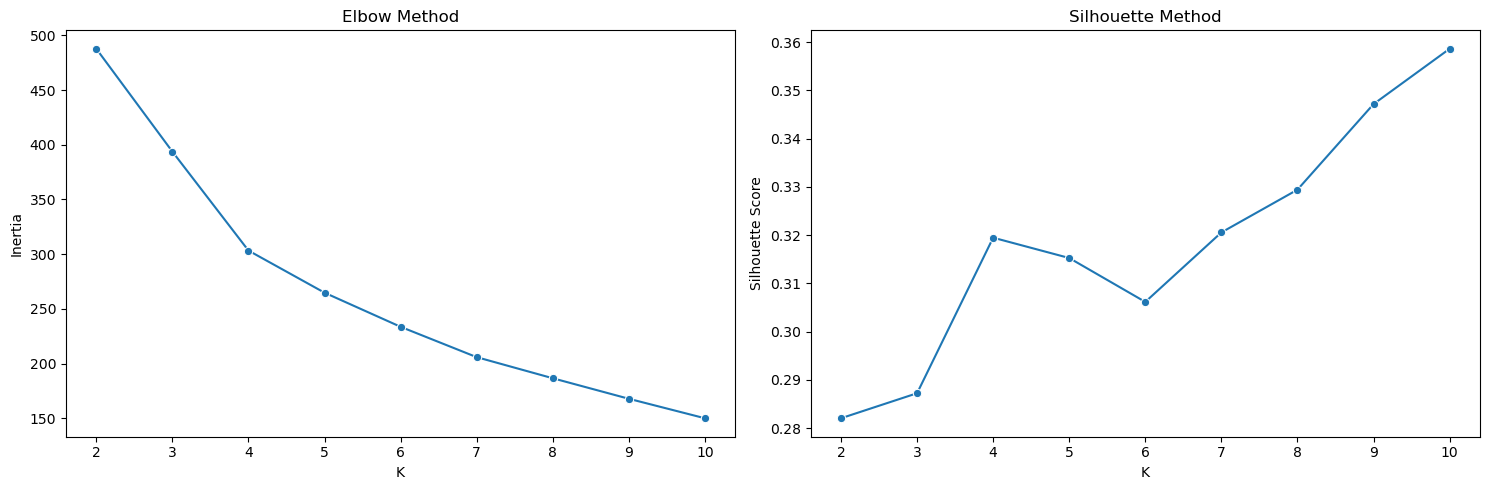

In [8]:
from funcoes_auxiliares import graficos_elbow_silhouette

graficos_elbow_silhouette(df_scaled)

In [9]:
from sklearn.cluster import KMeans
RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("clustering", KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [10]:
import joblib

joblib.dump(pipeline, "../modelos/pipeline_preprocessing_clustering.pkl")

['../modelos/pipeline_preprocessing_clustering.pkl']

In [11]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('standard', StandardScaler(),
                                  ['Age', 'Annual Income (k$)',
                                   'Spending Score (1-100)']),
                                 ('onehot', OneHotEncoder(), ['Gender'])]),
 'clustering': KMeans(n_clusters=5, n_init=10, random_state=42)}

In [12]:
pipeline["clustering"].labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 2,
       1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 4,
       1, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [13]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


O Que Cada Gráfico Representa?

1. Diagonais: Histogramas e Densidades Kernel (KDE)
   
As diagonais do pairplot exibem as distribuições individuais das três variáveis analisadas: Idade, Renda Anual e Pontuação de Gastos.

Cada curva representa a distribuição dos valores de uma variável para os clientes pertencentes a um mesmo cluster.

Podemos ver que alguns clusters possuem distribuições bem definidas, como o cluster laranja e o cluster verde.

2. Gráficos de Dispersão (Scatter Plots) nas Outras Células
   
Os gráficos fora da diagonal mostram as relações entre duas variáveis ao mesmo tempo.

Cada ponto representa um cliente e sua posição no gráfico indica os valores dessas duas variáveis.

A segmentação por cor revela que os clusters apresentam padrões distintos.

- Cluster Azul (0): Clientes com renda alta e pontuação de gastos baixa, indicando consumidores que não gastam muito, apesar da renda elevada.
  
- Cluster Laranja (1): Clientes com renda média e pontuação de gastos alta, indicando um grupo de consumidores que gastam bastante.

- Cluster Verde (2): Clientes mais jovens, com renda baixa e alta pontuação de gastos, podendo representar consumidores impulsivos ou com alta recorrência de compras.

- Cluster Vermelho (3): Clientes de idade mais avançada e gastos médios, possivelmente clientes mais cautelosos.

- Cluster Roxo (4): Clientes com renda baixa e baixa pontuação de gastos, o que pode indicar um perfil de consumo mais conservador.

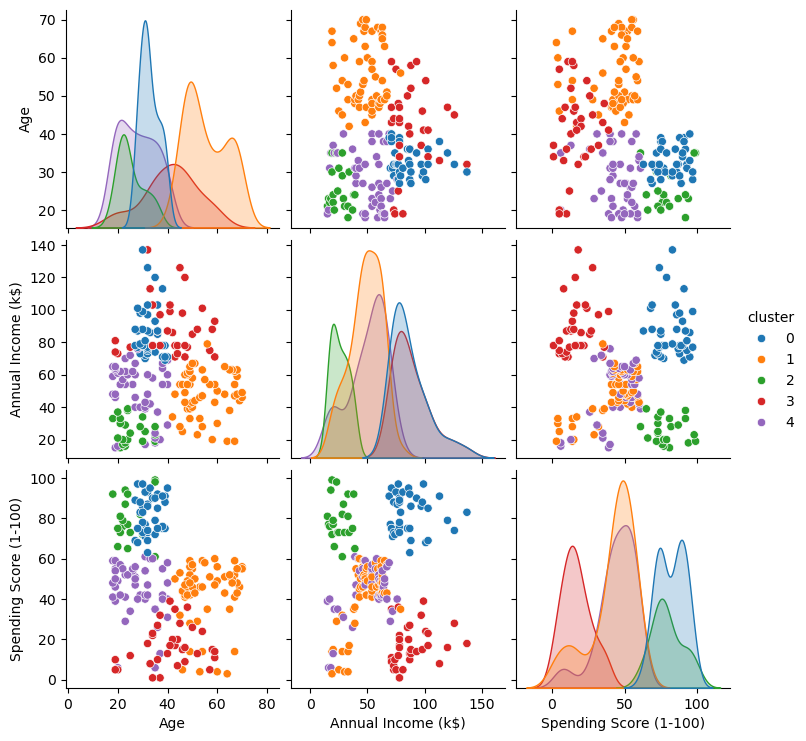

In [14]:
import seaborn as sns

sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10");

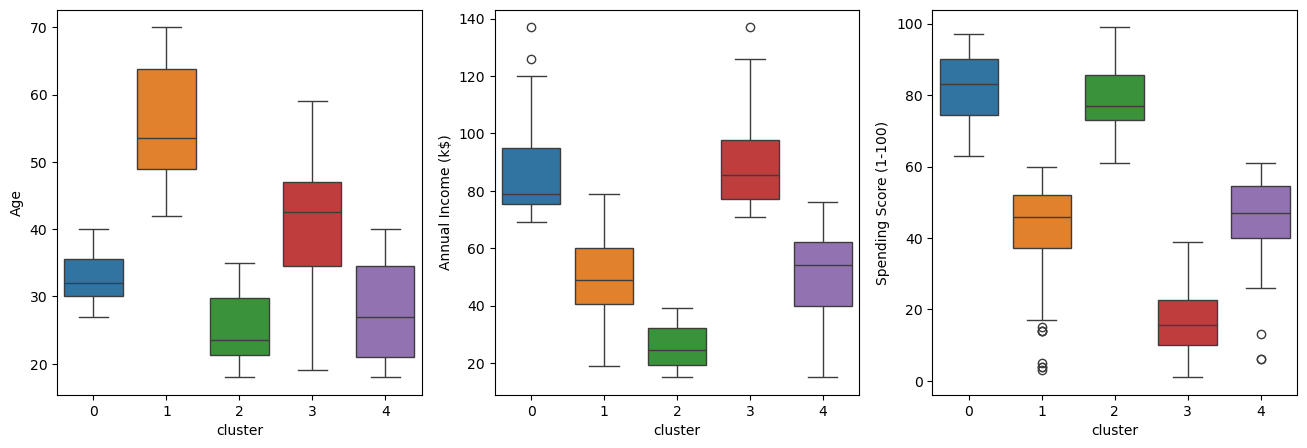

In [15]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, coluna in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=coluna, ax=ax, palette="tab10")

plt.show()

- Cluster 0 - pontuação de gastos alta, renda alta, idade jovem, o gênero feminino tem a maior renda anual, enquanto o masculino tem a maior idade e pontuação de gastos.
- Cluster 1 - pontuação de gastos moderada, renda moderada, idade alta, o gênero feminino tem maior pontuação de gastos, enquanto o masculino tem a maior idade e renda anual.
- Cluster 2 - pontuação de gastos alta, renda baixa, idade jovem, o gênero feminino tem maior pontuação de gastos, a maior idade e renda anual.
- Cluster 3 - pontuação de gastos baixa, renda alta, idade moderada, o gênero feminino tem maior pontuação de gastos, nota-se que os boxplots de idade entre ambos dos gêneros estão praticamente iguais, sendo que o masculino leva uma ligeira vantagem.
- Cluster 4 - pontuação de gastos moderada, renda moderada, idade jovem, o gênero feminino tem a maior renda anual e a maior idade, enquanto o masculino tem maior pontuação de gastos.

- Nota-se que em quatro dos cinco clusters, a predominância do gênero é feminina, somente no 3, que o masculino é maior que o feminino.

Siglas:
- MIG - Maior Idade por Gênero
- MRG - Maior Renda por Gênero
- MPG - Maior Pontuação por Gênero

Transformando os pontos acima em uma tabela

| Pontuação de Gastos | Renda | Idade | Cluster |  Gênero |   MIG   |   MRG   |   MPG   |
|---------------------|-------|-------|---------|---------|---------|---------|---------|
| Alta                | Alta  | Jovem | 0       | Feminino| Masculino| Feminino | Masculino|
| Moderada            | Moderada | Alta | 1     | Feminino| Masculino| Masculino| Feminino |
| Alta                | Baixa | Jovem | 2       | Feminino| Feminino | Feminino | Feminino |
| Baixa               | Alta  | Moderada | 3       | Masculino| Masculino| Feminino | Feminino |
| Moderada            | Moderada | Jovem | 4       | Feminino| Feminino| Feminino | Masculino|

In [16]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    39
1    58
2    22
3    34
4    47
Name: count, dtype: int64

In [17]:
df_clustered.groupby(["cluster", "Gender"]).size()

cluster  Gender
0        Female    21
         Male      18
1        Female    33
         Male      25
2        Female    13
         Male       9
3        Female    14
         Male      20
4        Female    31
         Male      16
dtype: int64

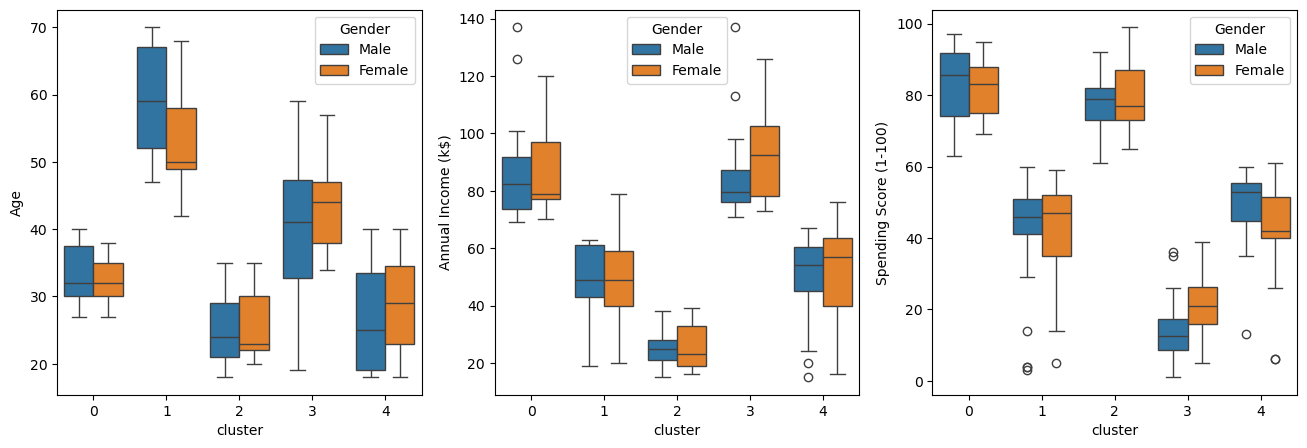

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, coluna in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=coluna, ax=ax, hue="Gender", palette="tab10")

plt.show()

In [19]:
pipeline["preprocessing"].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [20]:
pipeline["clustering"].cluster_centers_

array([[-0.44191719,  0.99158305,  1.23950275,  0.53846154,  0.46153846],
       [ 1.19862745, -0.46098141, -0.32703818,  0.56896552,  0.43103448],
       [-0.97439592, -1.32954532,  1.13217788,  0.59090909,  0.40909091],
       [ 0.17329545,  1.06645385, -1.2980103 ,  0.41176471,  0.58823529],
       [-0.78172248, -0.40306917, -0.21591396,  0.65957447,  0.34042553]])

In [21]:
centroids = pipeline["clustering"].cluster_centers_[:, :-2]
centroids

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])

O `ipympl` é uma ferramenta do Matplotlib que faz com que os seus gráficos fiquem interativos, alterando o seu respectivo zoom e o formato de visualização, sendo 2D ou 3D. Tudo que você precisa fazer, é colocar o comando `% matplotlib ipympl` para ativar a interatividade com o gráfico.

Antes de executar o código, caso você não tenha instalado o `ipympl` em seu ambiente virtual, consulte a [documentação](https://matplotlib.org/ipympl/) para utilizar em seu IDE.

Nos gráficos abaixo, as bolas maiores representa a identificação de cada centróide, e cada ponto colorido representa um cliente, enquanto as cores indicam diferentes clusters identificados pelo modelo. Esses grupos foram encontrados com base na similaridade dos dados, permitindo uma melhor compreensão dos padrões de comportamento dos clientes.

Embora a visualização tridimensional seja útil para identificar padrões visuais, a visualização em 3D pode ser afetada por pontos sobrepostos, o que dificulta a identificação precisa dos agrupamentos, além disso, a base original poderia conter mais variáveis relevantes para a segmentação. Porém, ao escolher apenas três colunas, perdemos informações que poderiam influenciar na separação dos clusters.

Durante o processo de seleção das variáveis para o gráfico, as colunas 'onehot__Gender_Female' e 'onehot__Gender_Male' foram removidas. Essa decisão foi tomada porque o gênero não é um fator determinante para o agrupamento principal, além de que sua inclusão poderia dificultar a visualização, já que não é uma variável contínua.

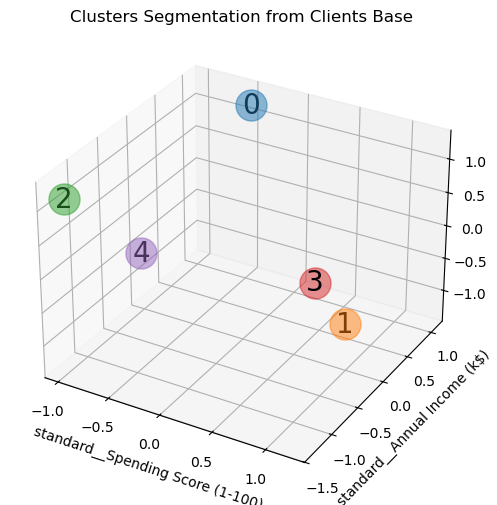

In [22]:
# %matplotlib ipympl
from funcoes_auxiliares import visualizar_clusters

visualizar_clusters(
    dataframe=df_scaled,
    colunas=['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)'],
    quantidade_cores=5,
    centroids=centroids,
    
)

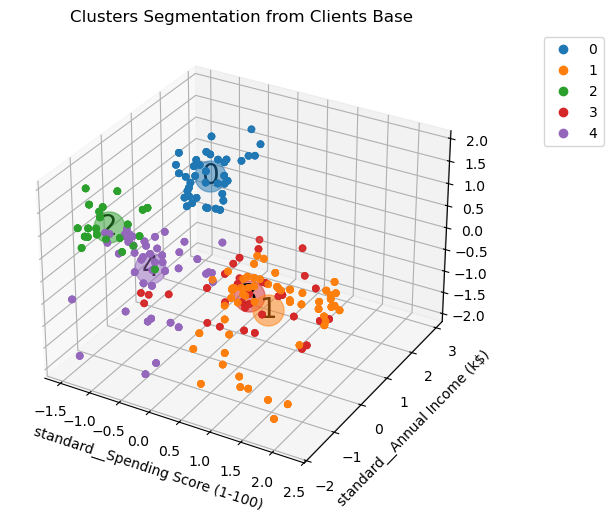

In [23]:
visualizar_clusters(
    dataframe=df_scaled,
    colunas=['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)'],
    quantidade_cores=5,
    centroids=centroids,
    mostrar_pontos=True,
    coluna_clusters=df_clustered["cluster"]
    
)